In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
#字体设置
plt.rcParams['font.sans-serif'] = ['Times New Roman']

In [2]:
#导入数据
data=pd.read_excel("data/boston.xlsx",index_col=0)


In [3]:
#划分数据集
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
#标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_set = scaler.fit_transform(train_set)
test_set = scaler.transform(test_set)
x_train,y_train=train_set[:,:-1] ,train_set[:,-1]
x_test,y_test=test_set[:,:-1] ,test_set[:,-1]


In [4]:
#线性回归
from util.model import LinearRegression
lr_multi=LinearRegression()
lr_multi.fit(x_train,y_train)
y_pred=lr_multi.predict(x_test)

In [5]:
#输出w,b
"Weight:", {lr_multi.w}, "Bias:", {lr_multi.b}

('Weight:', {-0.05285798195419803}, 'Bias:', {0.004141828232120693})

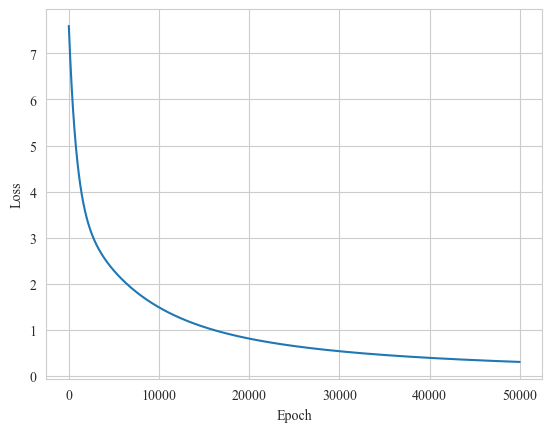

In [6]:
#loss曲线
plt.plot(range(len(lr_multi.loss)),lr_multi.loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# 评估
数学公式
$$MES=\frac{1}{m}\sum_{i=1}^{n}({\widehat{y_i}-y_i})^2$$
$$MES=\frac{1}{m}\sum_{i=1}^{n}({\widehat{y_i}-y_i})^2$$
$$R^2=1-\frac{\sum_{i=1}^{n}({\widehat{y_i}-y_i})^2}{\sum_{i=1}^{n}({\widehat{y_i}-\overline{y})^2}}$$


In [7]:
#模型评估
def mse(y_true,y_pred):
    return np.mean(np.square(y_true-y_pred))
def mae(y_true,y_pred):
    return np.mean(np.abs(y_true-y_pred))
def r2_score(y_true,y_pred):
    #公式 
    return 1-np.sum(np.square(y_true-y_pred))/np.sum(np.square(y_true-np.mean(y_true)))
"MES:",mse(y_test,y_pred),"MAE:",mae(y_test,y_pred),"R2:",r2_score(y_test,y_pred)


('MES:',
 0.8027371891106784,
 'MAE:',
 0.6538813517501582,
 'R2:',
 0.04905339672867248)

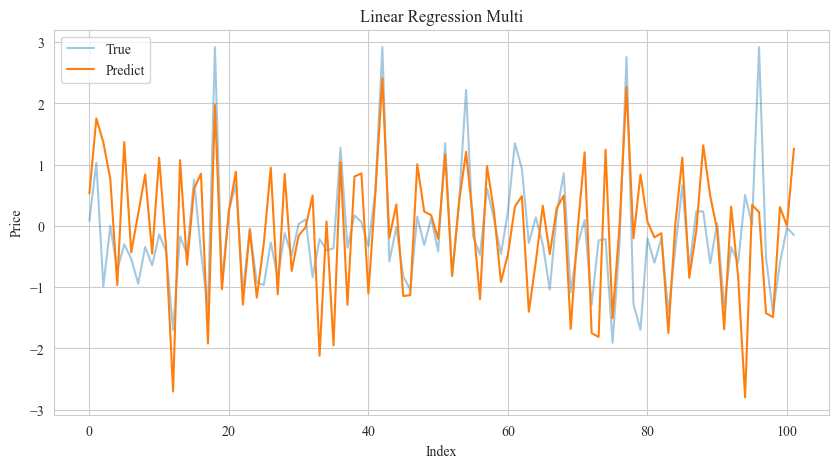

In [8]:
#绘制预测值与真实值对比图
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)),y_test,label="True",alpha=0.4)
plt.plot(range(len(y_pred)),y_pred,label="Predict",linewidth=1.5)
plt.title("Linear Regression Multi")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.show()

In [9]:
#公式法多元线性回归
def linear_regression(x,y):
    #计算w
    w=np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
    return w
w=linear_regression(x_train,y_train)
y_pred_formula=np.dot(x_test,w)



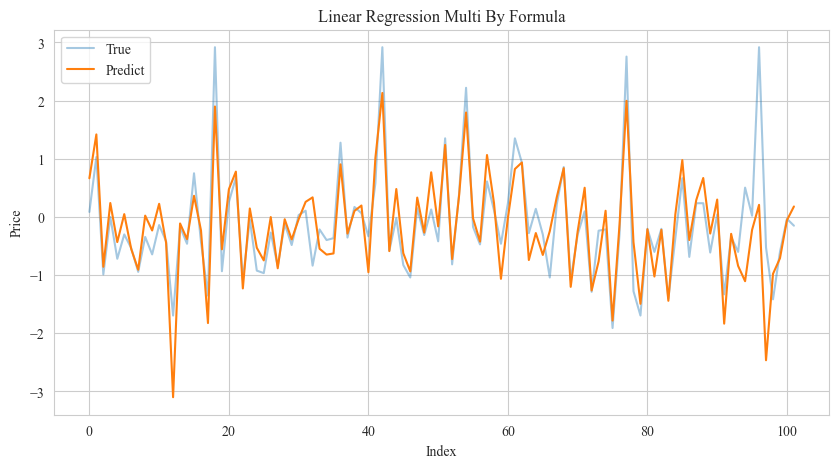

In [10]:
#绘制预测值与真实值对比图
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)),y_test,label="True",alpha=0.4)
plt.plot(range(len(y_pred_formula)),y_pred_formula,label="Predict",linewidth=1.5)
plt.title("Linear Regression Multi By Formula")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()

In [11]:
"MES:",mse(y_test,y_pred_formula),"MAE:",mae(y_test,y_pred_formula),"R2:",r2_score(y_test,y_pred_formula)

('MES:',
 0.2796151457548636,
 'MAE:',
 0.34215557790572537,
 'R2:',
 0.6687594935356314)

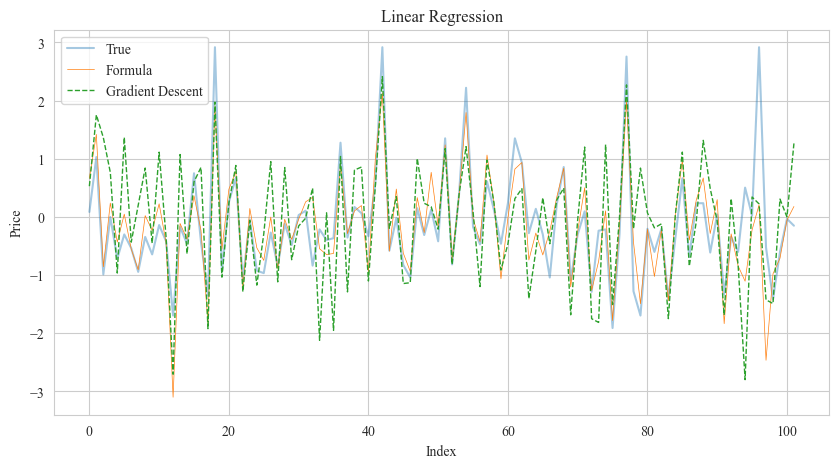

In [12]:
#公式法，梯度下降法对比
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)),y_test,label="True",alpha=0.4)
plt.plot(range(len(y_pred_formula)),y_pred_formula,label="Formula",linewidth=0.5)
plt.plot(range(len(y_pred)),y_pred,label="Gradient Descent",linewidth=1,linestyle='--')
plt.title("Linear Regression")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.show()
